<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 12</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

<p>**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)</p>

<p>**Abgabe**: Montag, 11. Juni, 2016 vor der Vorlesung</p>

<p>**Name**: <font color="red">Michel Vielmetter</font></p>

<p>**Matrikelnummer**: <font color="red">5920493</font></p><br />


<table style="border-style: none; width: 100%; margin-top: 20px; padding: 0px;"
><tr style="border-style: none; margin: 0px; padding: 0px;">
<td style="border-style: none; width: 80%; margin: 0px; padding: 0px; font-size: 20px; font-weight: bold">Integration mit gezinkten Würfeln</td>
<td style="border-style: none; width: 20%; margin: 0px; padding: 0px; text-align: right">(5 Punkte)</td></tr></table>



In dieser Aufgabe wollen wir uns mit der **Integration** von Funktionen mithilfe von **Zufallszahlen** befassen. Die ersten Schritte in diese Richtung haben wir in der Vorlesung besprochen und  wollen nun an einfachen Beispielen die verschiedenen **Sampling-Methoden** untersuchen. 

Beginnen wir mit der folgenden Funktion:
\begin{equation}
f(x) = 2 + 0.1\cdot\cos(x),\quad x\in [-\dfrac{\pi}{2},\; \dfrac{\pi}{2}]
\end{equation}

Sie können sich durch simples plotten leicht davon überzeugen, dass die Funktion relativ flach ist und sich deshalb dazu eignet mit einer gleichförmigen Verteilung integriert zu werden. Führen Sie nun eine Integration dieser Funktion mit bis zu $N=1000$ *gleichförmig verteilten* Zufallszahlen durch und plotten Sie das Ergebnis der Integration gegen die Anzahl gezogender Zufallszahlen $N$. Vergleichen Sie außerdem Ihr Ergebnis mit der numerischen Lösung, die Sie mit der Paket *Cubature* bestimmen können. Ein Beispiel dazu finden Sie in der ersten Inputzelle.

Als nächstes betrachten wir die Funktion
\begin{equation}
g(x) = \cos(x) \cdot \exp{\left(-\dfrac{x^2}{0.01}\right)},\quad x \in (-\infty, \infty)
\end{equation}

Bereits auf den ersten Blick ist klar, dass das Integral dieser Funktion hauptsächlich durch einen kleinen Bereich um 0 bestimmt wird. Deshalb ist es zunächst einmal zulässig den Integrationsbereich auf ein endliches Intervall, zum Beispiel $(-20, 20)$, einzuschränken. Bestimmen Sie das Integral nun wie zuvor mithilfe einer gleichförmig verteilten Zufallsverteilung und plotten Sie das Ergebnis als Funktion der Anzahl gezogener Zufallszahlen. Benutzen Sie dann die Generatoren aus dem Paket *Distributions*, um Zufallszahlen gemäß einer Gaussverteilung mit Mittelwert $\mu$ und Standardabweichung $\sigma$ zu erzeugen. Passen Sie diese Parameter so an, dass die Form der gesampleten Gauß-Kurve möglichst genau der Funktion $g(x)$ entspricht und führen Sie auch diese Integration durch und vergleichen Sie beide Ergebnisse mit der durch *quad* gewonnenen Lösung. 

Beachten Sie, dass Sie mit der Gauß verteilung Zahlen aus $(-\infty, \infty)$ erzeugen. Aufgrund der stark um den Mittelwert zentrierten Form der Verteilung ist der Fehler, den wir gegenüber der Integration mit eingeschränktem Integrationsbereich machen vernachlässigbar. Alternative könnte man nur Zufallszahlen im Bereich $(-20, 20)$ akzeptieren und die Verteilung neu zu skalieren.


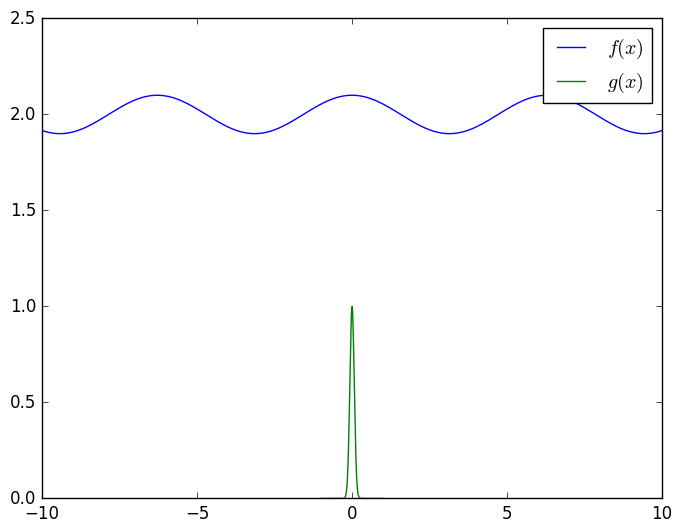

In [1]:
using Distributions, Cubature, PyPlot
f(x) = 2 + .1 .* cos(x)
g(x) = cos(x) .* e.^(-x.^2/.01)

plot(-10:.1:10, f(-10:.1:10), label=L"$f(x)$")
plot(-1:.001:1, g(-1:.001:1), label=L"$g(x)$")
legend()
;

In [2]:
"""
integrate a function with a uniform random distribution

N: the count of random numbers
f: the function to integrate
a: start of the integral
b: end of the integral
"""
function uniform_integration(N::Number, f::Function, a::Number, b::Number)
    integral = 0.
    random_gen = Uniform(a, b)
    for i in 1:N
        integral += f(rand(random_gen))
    end
    
    return integral*(b-a)/N
end

norm(x, μ, σ) = 1./(σ.*sqrt(2.*π)).*e.^(-1/2.*((x.-μ)./σ).^2)

"""
integrate a function with a normal random distribution
for best results choose σ and μ so a gauss fits your graph

N: the count of random numbers
f: the function to integrate
a: start of the integral
b: end of the integral
σ and μ will influence the normal distribution
"""
function normal_integration(N::Number, f::Function, a::Number, b::Number; σ::Number = 1, μ::Number = 0)
    sum = 0.
    num = 0.
    random_gen = Normal(μ, σ)
    for i in 1:N
        while true
            num = rand(random_gen)
            num > a && num < b && break # only choose randomnumbers in the range of a < num < b
        end
        sum += f(num)/norm(num, μ, σ)
    end
    sum / N
end;

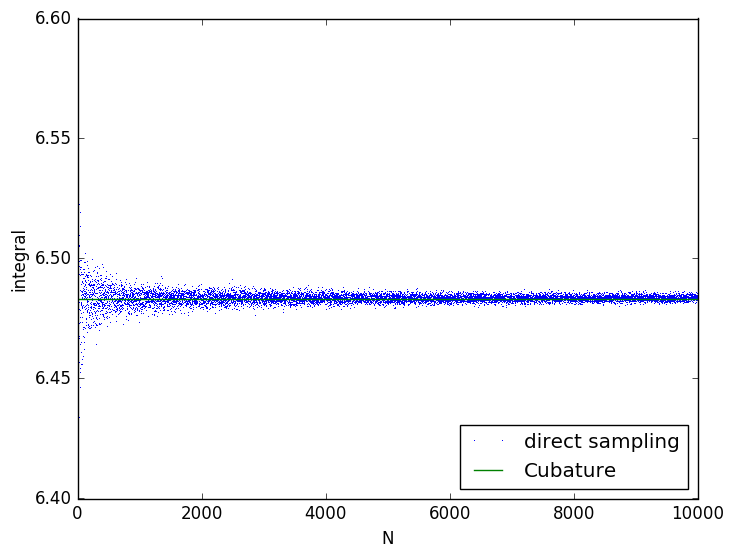

In [3]:
"""
integrate f(x) with direct sampling
"""
N=10000
F=hquadrature(f, -π/2, π/2)[1]
FRand = zeros(Float64, N)
for i in 1:N
    FRand[i] = uniform_integration(i, f, -π/2, π/2)
end
plot(1:N, FRand, ",", label="direct sampling")
plot([1,N], [F,F], label="Cubature")
ylim(6.4,6.6)
xlabel("N")
ylabel("integral")
legend(loc=4);

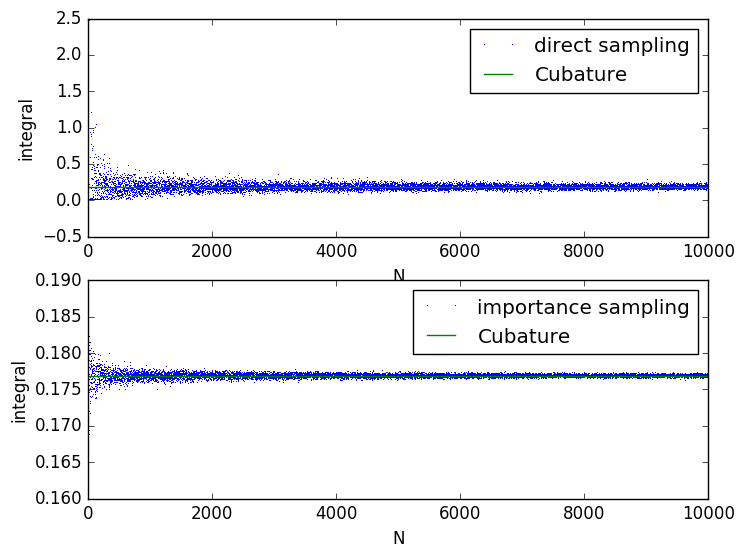

In [4]:
"""
integrate g(x) via direct sampling and importance sampling
"""
N=10000
(a, b) = -20, 20
G=hquadrature(g, -20, 20)[1]
Guni = zeros(Float64, N)
Gnormal = zeros(Float64, N)
for i in 1:N
    Guni[i] = uniform_integration(i, g, a, b)
end
for i in 1:N
    Gnormal[i] = normal_integration(i, g, a, b, σ = .075)
end

subplot(211)
plot(1:N, Guni, ",", label="direct sampling")
plot([1,10000], [G,G], label="Cubature")
xlabel("N")
ylabel("integral")
legend()

subplot(212)
plot(1:N, Gnormal, ",", label = "importance sampling")
plot([1,10000], [G,G], label="Cubature")
xlabel("N")
ylabel("integral")
legend()
;

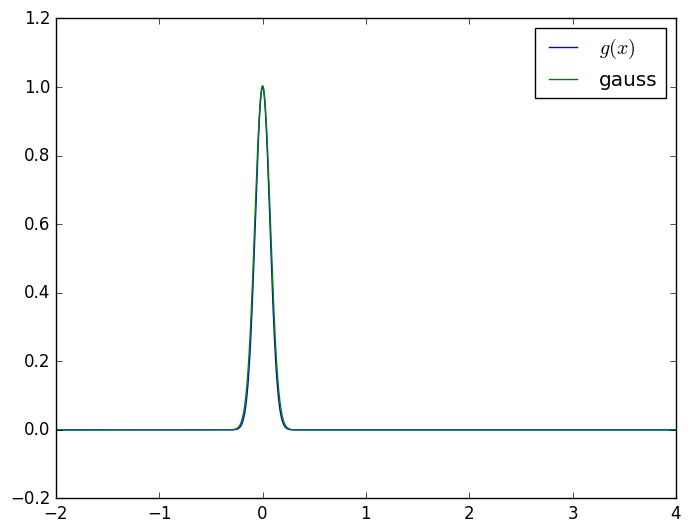

PyObject <matplotlib.legend.Legend object at 0x7f8885c26850>

In [5]:
#testing for a nice p(x)
σ = .075
μ = 0
plot(-2:.001:4, g(-2:.001:4), label=L"$g(x)$")

plot(-2:.001:4, norm(-2:.001:4, μ, σ)./5.3, label="gauss")
legend()